In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

#p='/dls/i16/data/2020/cm26473-2/%i.nxs'
p = '/dls/i16/data/2021/cm28156-10/%i.nxs'

=== Importing dlstools package


In [2]:
# Google docs log book
#https://docs.google.com/document/d/1G9WqgCC1CA5FP31A94UbZ0A1e726TeTnCvF1jkYoEwM/edit?pli=1#
#scripts '/dls_sw/i16/scripts/2021/cm28156-10'
#CoK = 7.709 keV
#Ka1 = 6.93
#Ka2 = 6.92
#Kb1 = 7.65

(-9.0, 189.0, 7.463470744680851, 7.711263297872341)

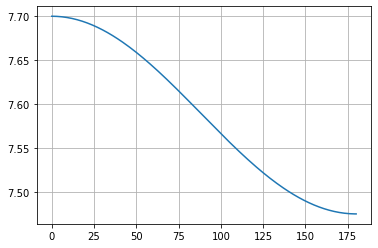

In [3]:
def compton_e2(e1, tth):
    #Calculate compton energy (keV, degrees)
    mc2 = 511.0
    return e1/(1 + e1/mc2 * (1-np.cos(tth*np.pi/180)) )
    
compton_e2(50.0, 170.0)
tth = np.arange(0,181,1)
e1 = 7.7
e2 = compton_e2(e1, tth)
plot(tth, e2); grid(1); axis('tight')

In [4]:
plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

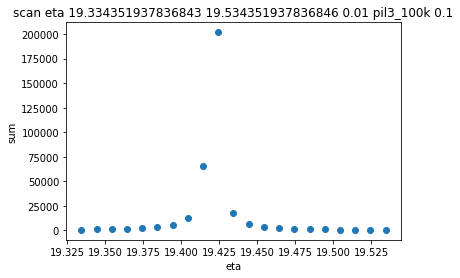

In [5]:
#n = pdnx(p % 823290) # energy calibration (0.2 eV change but previous was noisy)
#n.plot('DCMenergy','ic1')
n = pdnx(p % 900027)
n.nx.plot()

TimeFromEpoch        TimeSec  count_time  delta_axis_offset        eta   ic1monitor         kap     kdelta  kgam  kmu       kphi       kth  maxval   maxx  maxy  path          rc     sum       sum_eff
0    1.628593e+09  531209.293726         0.1                8.8  19.409352  1951.153983 -135.480408  37.668704   0.0  0.0  57.512078  76.92143   243.0  244.0  95.0   1.0  300.244446  1320.0  3.342210e+10
1    1.628593e+09  531210.508172         0.1                8.8  19.410352  1951.257779 -135.480408  37.668704   0.0  0.0  57.512078  76.92243   315.0  244.0  95.0   2.0  300.234406  1583.0  4.008120e+10
2    1.628593e+09  531211.562999         0.1                8.8  19.411352  1950.986072 -135.480408  37.668704   0.0  0.0  57.512078  76.92343   367.0  244.0  95.0   3.0  300.226898  1783.0  4.514515e+10
3    1.628593e+09  531212.768932         0.1                8.8  19.412352  1950.738791 -135.480408  37.668704   0.0  0.0  57.512078  76.92443   514.0  244.0  95.0   4.0  300.217529  2284.0  5.783036e+10
..            ...            ...         ...                ...        ...          ...         ...        ...   ...  ...        ...       ...     ...    ...   ...   ...         ...     ...           ...
27   1.628593e+09  531241.353965         0.1                8.8  19.436352  1950.464032 -135.480408  37.668704   0.0  0.0  57.512078  76.94843   144.0  244.0  95.0  28.0  300.018463   747.0  1.891387e+10
28   1.628593e+09  531242.563413         0.1                8.8  19.437352  1950.567829 -135.480408  37.668704   0.0  0.0  57.512078  76.94943   136.0  244.0  95.0  29.0  300.013916   654.0  1.655913e+10
29   1.628593e+09  531243.787896         0.1                8.8  19.438352  1950.647204 -135.480408  37.668704   0.0  0.0  57.512078  76.95043   102.0  244.0  95.0  30.0  300.004791   561.0  1.420439e+10
30   1.628593e+09  531244.828158         0.1                8.8  19.439352  1950.668574 -135.480408  37.668704   0.0  0.0  57.512078  76.95143    80.0  244.0  95.0  31.0  299.996338   499.0  1.263457e+10

[31 rows x 19 columns]

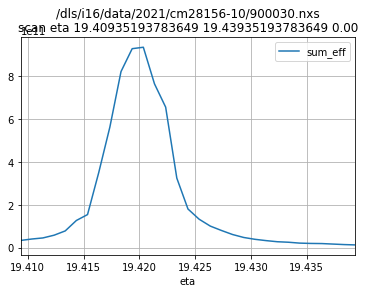

In [6]:
#006
n = pdnx(p % 900030)
#n = pdnx(p % 900048)
n['sum_eff'] = n['sum']/n.nx.entry1.before_scan.gains_atten.Transmission/n['count_time']
n.plt('eta', 'sum_eff')
n

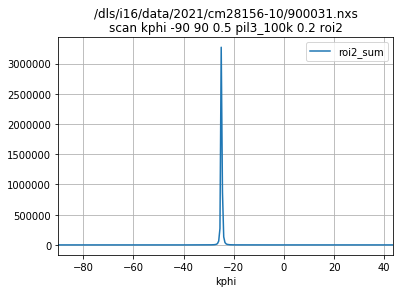

In [7]:
#104
n = pdnx(p % 900031)
n.plt('kphi', 'roi2_sum')

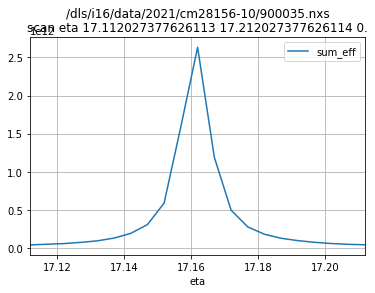

In [8]:
#104
n = pdnx(p % 900035)
n['sum_eff'] = n['sum']/n.nx.entry1.before_scan.gains_atten.Transmission/n['count_time']
n.plt('eta', 'sum_eff')

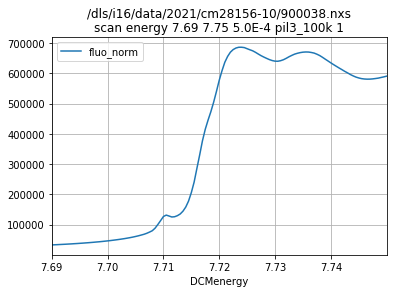

In [9]:
#fluo
n = pdnx(p % 900038)
n['fluo_norm'] = n['sum']/n['ic1monitor']
n.plt('DCMenergy', 'fluo_norm')

Text(0.5, 0, 'pil3_thesh')

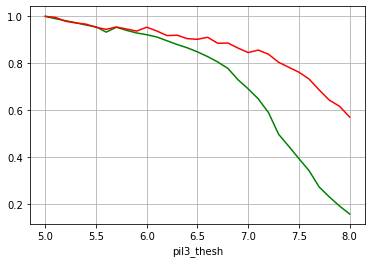

In [10]:
#pilatus threshold
figure()
n = pdnx(p % 900040)
n['pil_norm'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.pil_norm,'g'); grid(1); xlabel('pil3_thesh')
n = pdnx(p % 900049)
n['pil_norm'] = n['roi2_sum']/max(n['roi2_sum'])
plot(n.pil3_tresh, n.pil_norm,'r'); grid(1); xlabel('pil3_thesh')


900085 scan psi -120.99999999999999 -118.99999999999999 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900089 scan psi -122.0 -120.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900093 scan psi -123.0 -121.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900097 scan psi -124.00000000000001 -122.00000000000001 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900101 scan psi -125.0 -123.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900105 scan psi -126.00000000000001 -124.00000000000001 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900109 scan psi -127.0 -125.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900113 scan psi -128.0 -126.00000000000001 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900117 scan psi -129.0 -127.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900121 scan psi -130.0 -128.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900125 scan psi -131.0 -129.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900129 scan psi -132.0 -130.0 0.05 hkl [0, 0, 9] pil3_100k 0.5 roi2 roi1
900133 scan psi -133.0 -131.0 0.0

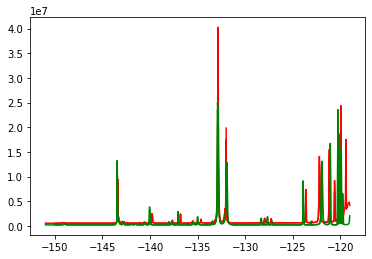

In [11]:
#for i in range(900082, 999999):
#    try:
#        n = pdnx(p % i)
#        print(i, n.nx.entry1.scan_command)
#    except:
#        break
        
figure()
for i in range(900085, 900205+1, 4):
    try:
        n = pdnx(p % i)
        print(i, n.nx.entry1.scan_command)
        plot(n.psi, n.roi2_sum, 'r')
    except:
        break
      
for i in range(900209, 900329+1, 4):
    try:
        n = pdnx(p % i)
        print(i, n.nx.entry1.scan_command)
        plot(n.psi, n.roi2_sum, 'g')
    except:
        break        
        
        
#figure()
#for i in range(900083, 999999, 4):
#    try:
#        n = pdnx(p % i)
#        print(i, n.nx.entry1.scan_command)
#        plot(n.chi, n.chi_short_sum)
#    except:
#        break
        


In [12]:
n

TimeFromEpoch        TimeSec  count_time  delta_axis_offset             h   ic1monitor             k         kap    kdelta  kgam  kmu       kphi        kth    l  maxval   maxx   maxy  path     psi          rc  roi1_maxval  roi1_maxx  roi1_maxy  roi1_sum  roi2_maxval  roi2_maxx  roi2_maxy  roi2_sum        sum
0    1.628625e+09  563719.974528         0.5                8.8  4.352074e-14  1986.677243 -2.908784e-14 -135.512976  58.20301   0.0  0.0  71.951235  87.262904  9.0  2051.0  233.0   95.0   1.0 -151.00  299.310944        148.0        1.0       14.0   18894.0       2051.0       16.0       25.0  215289.0  8200815.0
1    1.628625e+09  563721.727783         0.5                8.8  2.620126e-14  1986.497127 -1.643130e-14 -135.514309  58.20301   0.0  0.0  71.902098  87.263492  9.0   908.0  233.0   92.0   2.0 -150.95  299.298798        138.0        4.0       12.0   18108.0        908.0       16.0       22.0  212556.0  8201082.0
2    1.628625e+09  563723.646263         0.5                8.8 -7.993606e-15  1986.030036  1.998401e-15 -135.515642  58.20301   0.0  0.0  71.852962  87.264079  9.0   355.0  233.0   90.0   3.0 -150.90  299.284058        137.0        1.0        8.0   17672.0        355.0       16.0       20.0  210626.0  8195532.0
3    1.628625e+09  563725.410440         0.5                8.8  2.620126e-14  1986.646714 -1.454392e-14 -135.516973  58.20301   0.0  0.0  71.803825  87.264665  9.0   274.0  233.0   87.0   4.0 -150.85  299.271973        128.0        9.0        0.0   16869.0        274.0       16.0       17.0  207514.0  8197526.0
..            ...            ...         ...                ...           ...          ...           ...         ...       ...   ...  ...        ...        ...  ...     ...    ...    ...   ...     ...         ...          ...        ...        ...       ...          ...        ...        ...       ...        ...
37   1.628625e+09  563790.486258         0.5                8.8  7.993606e-15  1984.360113  1.110223e-15 -135.561922  58.20301   0.0  0.0  70.132955  87.284100  9.0  3084.0  237.0  101.0  38.0 -149.15  298.801086       3084.0        2.0       14.0   45183.0       3084.0       20.0       31.0  267377.0  8269910.0
38   1.628625e+09  563792.408615         0.5                8.8  1.776357e-14  1984.228839 -1.698641e-14 -135.563234  58.20301   0.0  0.0  70.083805  87.284657  9.0  3701.0  235.0  100.0  39.0 -149.10  298.789948       3701.0        0.0       13.0   60612.0       3701.0       18.0       30.0  293060.0  8270260.0
39   1.628625e+09  563794.196337         0.5                8.8  2.886580e-14  1984.268527 -2.053913e-14 -135.564545  58.20301   0.0  0.0  70.034655  87.285213  9.0  6103.0  233.0   99.0  40.0 -149.05  298.777405       3169.0        0.0       11.0   64098.0       6103.0       16.0       29.0  330891.0  8301465.0
40   1.628625e+09  563796.106872         0.5                8.8  1.421085e-14  1984.466962  5.551115e-16 -135.565856  58.20301   0.0  0.0  69.985505  87.285768  9.0  6102.0  233.0   96.0  41.0 -149.00  298.764221       3463.0        0.0        8.0   50772.0       6102.0       16.0       26.0  358034.0  8320335.0

[41 rows x 29 columns]

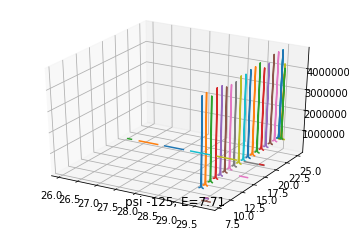

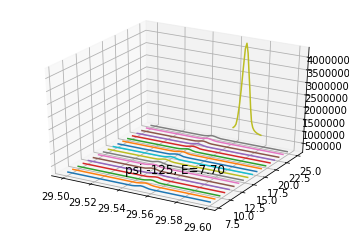

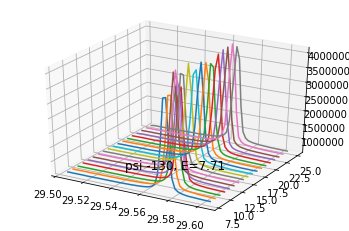

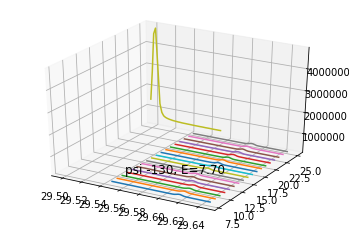

In [13]:
#337 psi -125, E=7.71
#338 psi -125, E=7.70
#337 psi -130, E=7.71
#338 psi -130, E=7.70

from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(900337, 999999, 4):
    try:
        n = pdnx(p % i)
        n['psi'] = float(n.nx.entry1.before_scan.psi.psi)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        ax.plot(n.eta, n.Ta, n.roi2_sum); title('psi -125, E=7.71')
    except:
        break
        
        
ax = figure().gca(projection='3d')
for i in range(900338, 999999, 4):
    try:
        n = pdnx(p % i)
        n['psi'] = float(n.nx.entry1.before_scan.psi.psi)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        ax.plot(n.eta, n.Ta, n.roi2_sum); title('psi -125, E=7.70')
    except:
        break
        

ax = figure().gca(projection='3d')
for i in range(900339, 999999, 4):
    try:
        n = pdnx(p % i)
        n['psi'] = float(n.nx.entry1.before_scan.psi.psi)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        ax.plot(n.eta, n.Ta, n.roi2_sum); title('psi -130, E=7.71')
    except:
        break
        
  
ax = figure().gca(projection='3d')
for i in range(900340, 999999, 4):
    try:
        n = pdnx(p % i)
        n['psi'] = float(n.nx.entry1.before_scan.psi.psi)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        ax.plot(n.eta, n.Ta, n.roi2_sum); title('psi -130, E=7.70')
    except:
        break
        
  
    
    
    
    

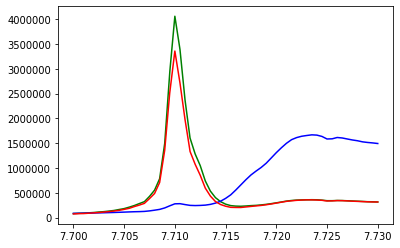

In [14]:
#009 resonance at T=25K
figure()
n = pdnx(p % 900420)
plot(n.DCMenergy, n.roi1_sum,'g')
plot(n.DCMenergy, n['sum']/100,'b')
n = pdnx(p % 900424)
plot(n.DCMenergy, n.roi1_sum,'r')



In [15]:
n

DCMenergy  TimeFromEpoch        TimeSec   Uenergy  count_time  delta_axis_offset  energy2         h   ic1monitor         k         kap     kdelta  kgam  kmu       kphi        kth         l   maxval   maxx  maxy  path          rc  roi1_maxval  roi1_maxx  roi1_maxy  roi1_sum  roi2_maxval  roi2_maxx  roi2_maxy   roi2_sum          sum
0    7.700000   1.628679e+09  617183.372554  7.700054         0.5                8.8   7.7000 -0.001491  2059.961532  0.001295 -136.007811  58.203010   0.0  0.0  51.272043  87.462186  8.999999  22361.0  241.0  95.0   1.0  299.201050      22361.0        6.0        8.0   73402.0      22361.0       24.0       25.0   263170.0    8248075.0
1    7.700500   1.628679e+09  617188.043395  7.700449         0.5                8.8   7.7005 -0.001491  2059.256319  0.001295 -136.007811  58.198868   0.0  0.0  51.272043  87.460115  8.999999  24122.0  241.0  95.0   2.0  299.169495      24122.0        6.0        8.0   78915.0      24122.0       24.0       25.0   272252.0    8439042.0
2    7.700996   1.628679e+09  617191.881182  7.700992         0.5                8.8   7.7010 -0.001491  2058.172545  0.001295 -136.007811  58.194727   0.0  0.0  51.272043  87.458044  8.999999  23405.0  241.0  95.0   3.0  299.144775      23405.0        6.0        8.0   80646.0      23405.0       24.0       25.0   278801.0    8590646.0
3    7.701502   1.628679e+09  617195.520828  7.701337         0.5                8.8   7.7015 -0.001491  2056.502623  0.001295 -136.007811  58.190587   0.0  0.0  51.272043  87.455974  8.999999  27993.0  241.0  95.0   4.0  299.120697      27993.0        6.0        8.0   87534.0      27993.0       24.0       25.0   290536.0    8811885.0
..        ...            ...            ...       ...         ...                ...      ...       ...          ...       ...         ...        ...   ...  ...        ...        ...       ...      ...    ...   ...   ...         ...          ...        ...        ...       ...          ...        ...        ...        ...          ...
57   7.728500   1.628679e+09  617424.970123  7.728483         0.5                8.8   7.7285 -0.001491  2038.890580  0.001295 -136.007811  57.967928   0.0  0.0  51.272043  87.344645  8.999999   5210.0  241.0  95.0  58.0  301.692322       5210.0        6.0        8.0  321819.0       5210.0       24.0       25.0  3817166.0  152100375.0
58   7.729000   1.628679e+09  617429.309942  7.728879         0.5                8.8   7.7290 -0.001491  2037.132123  0.001295 -136.007811  57.963821   0.0  0.0  51.272043  87.342592  8.999999   4611.0  241.0  95.0  59.0  301.662201       4611.0        6.0        8.0  317934.0       4611.0       24.0       25.0  3778482.0  150798248.0
59   7.729502   1.628679e+09  617432.937878  7.729424         0.5                8.8   7.7295 -0.001491  2037.544263  0.001295 -136.007811  57.959716   0.0  0.0  51.272043  87.340539  8.999999   4454.0  241.0  95.0  60.0  301.637573       4454.0        6.0        8.0  314035.0       4454.0       24.0       25.0  3743863.0  149252761.0
60   7.730002   1.628679e+09  617436.619991  7.729870         0.5                8.8   7.7300 -0.001491  2035.272925  0.001295 -136.007811  57.955610   0.0  0.0  51.272043  87.338486  8.999999   4167.0  241.0  95.0  61.0  301.611633       4167.0        6.0        8.0  314420.0       4167.0       24.0       25.0  3742071.0  149100566.0

[61 rows x 31 columns]

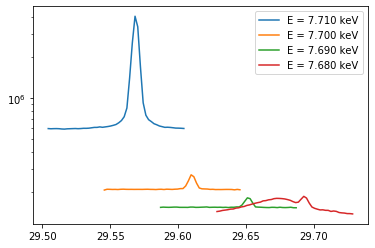

In [16]:
#009 resonance at T=25K
figure()
for scan in range(900425, 900428+1):
    n = pdnx(p % scan)
    plot(n.eta, n.roi2_sum, label='E = %.3f keV' % n.nx.entry1.sample.beam.incident_energy)
yscale('log'); legend()



<IPython.core.display.Javascript object>


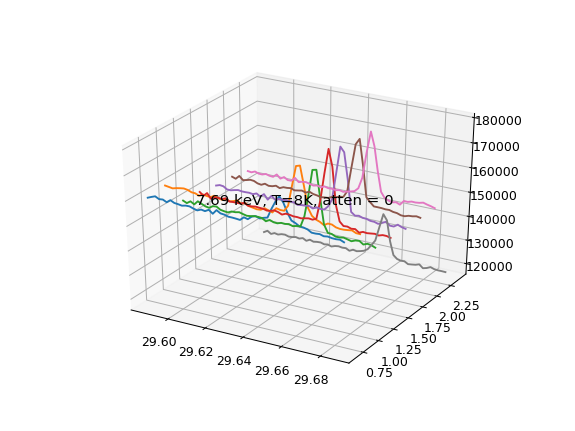

In [17]:
%matplotlib notebook
ax = figure().gca(projection='3d')
for i in range(900429, 900436+1):
    try:
        n = pdnx(p % i)
        n['sy'] = float(n.nx.entry1.before_scan.positions.sy)
        ax.plot(n.eta, n.sy, n.roi2_sum); title('7.69 keV, T=8K, atten = 0')
    except:
        break

<IPython.core.display.Javascript object>


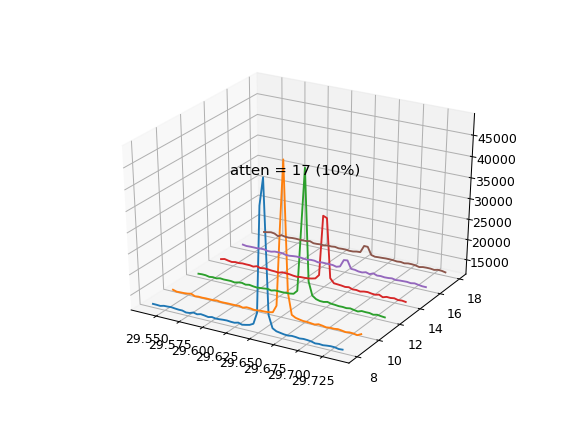

In [18]:
ax = figure().gca(projection='3d')
for i in range(900437, 900442+1):
    try:
        n = pdnx(p % i)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        ax.plot(n.eta, n.Ta, n.roi2_sum); title('atten = 17 (10%)')
    except:
        break

<IPython.core.display.Javascript object>


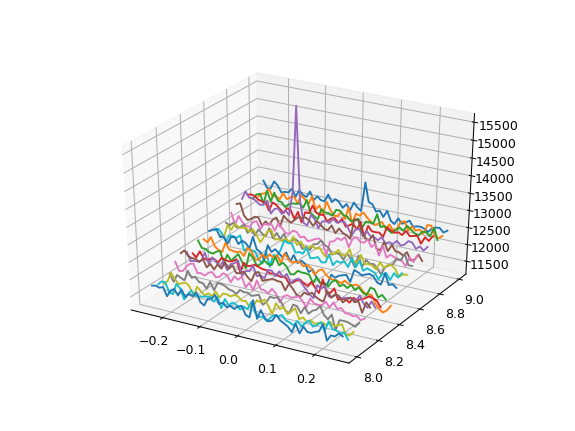

In [19]:
ax = figure().gca(projection='3d')
for i in range(900444, 900464+1):
    try:
        n = pdnx(p % i)
        n['l'] = float(n.nx.entry1.before_scan.diffractometer_sample.l)
        ax.plot(n.eta-np.mean(n.eta), n.l, n.roi2_sum);
    except:
        break

<IPython.core.display.Javascript object>


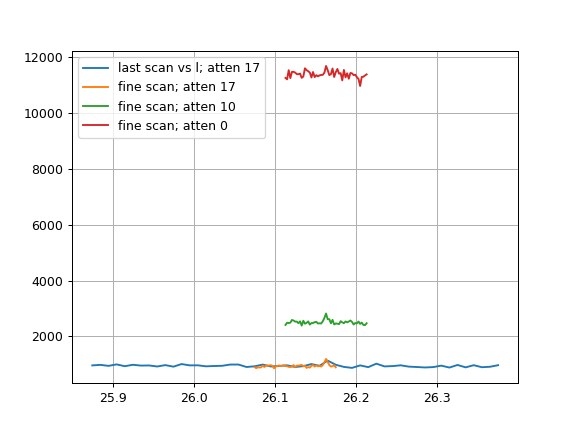

In [20]:
figure()
n = pdnx(p % 900464)
plot(n.eta, n.roi1_sum, label='last scan vs l; atten 17')
n = pdnx(p % 900465)
plot(n.eta, n.roi1_sum, label='fine scan; atten 17')
n = pdnx(p % 900466)
plot(n.eta, n.roi1_sum, label='fine scan; atten 10')
n = pdnx(p % 900467)
plot(n.eta, n.roi1_sum, label='fine scan; atten 0')
grid(1); legend()

<IPython.core.display.Javascript object>


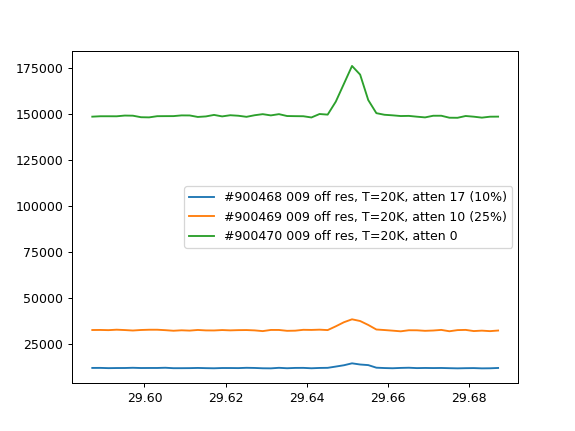

In [21]:
figure()
n = pdnx(p % 900468)
plot(n.eta, n.roi2_sum, label='#900468 009 off res, T=20K, atten 17 (10%)')
n = pdnx(p % 900469)
plot(n.eta, n.roi2_sum, label='#900469 009 off res, T=20K, atten 10 (25%)')
n = pdnx(p % 900470)
plot(n.eta, n.roi2_sum, label='#900470 009 off res, T=20K, atten 0')
legend()

<IPython.core.display.Javascript object>


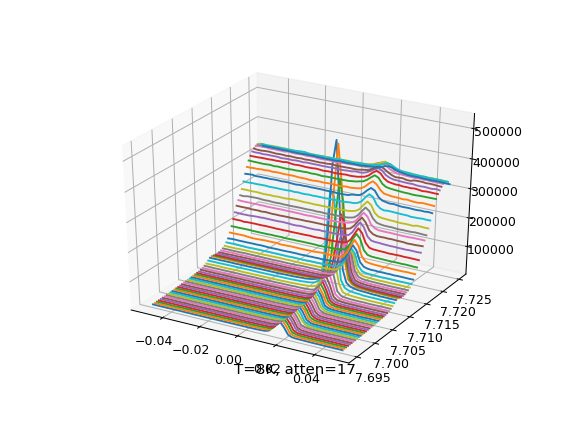

In [22]:
ax = figure().gca(projection='3d')
for i in range(900494, 900554+1):
    try:
        n = pdnx(p % i)
        n['energy'] = float(n.nx.entry1.sample.beam.incident_energy )
        ax.plot(n.eta-np.mean(n.eta), n.energy, n.roi2_sum);
        title('T=8K, atten=17')
    except:
        break

<IPython.core.display.Javascript object>


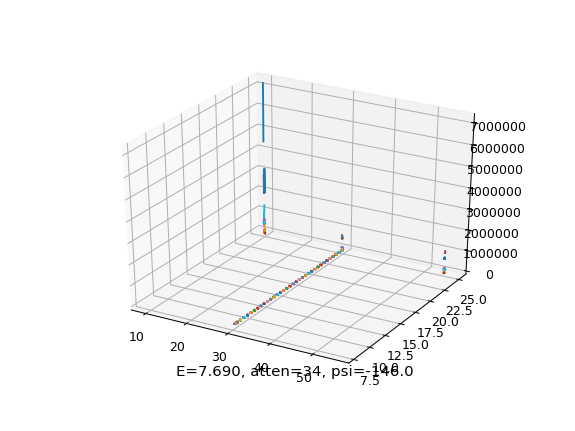

In [23]:
ax = figure().gca(projection='3d')
for i in range(900555, 9900554+1):
    try:
        n = pdnx(p % i)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        psi = float(n.nx.entry1.before_scan.psi.psi)
        energy = n.nx.entry1.sample.beam.incident_energy 
        atten = n.nx.entry1.before_scan.gains_atten.Atten
        transmission = n.nx.entry1.before_scan.gains_atten.Transmission
        ax.plot(n.eta, n.Ta, n.roi2_sum)
        title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))
    except:
        break

<IPython.core.display.Javascript object>


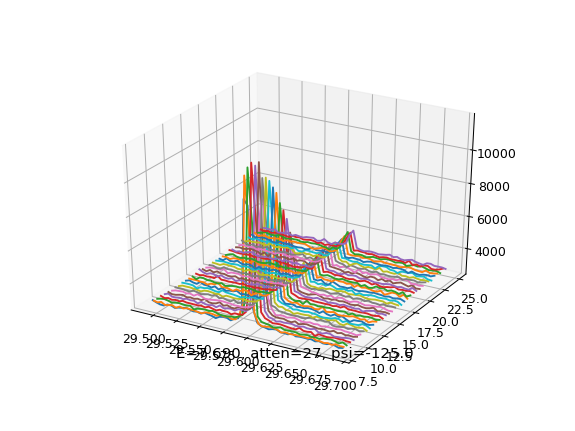

<IPython.core.display.Javascript object>


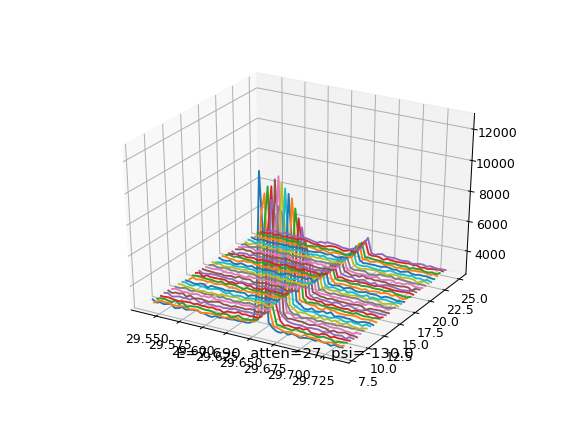

<IPython.core.display.Javascript object>


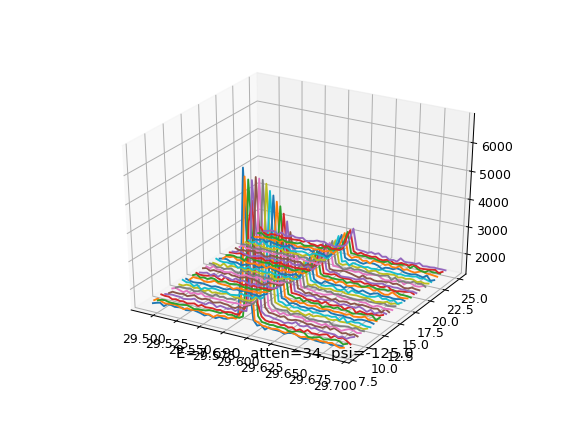

<IPython.core.display.Javascript object>


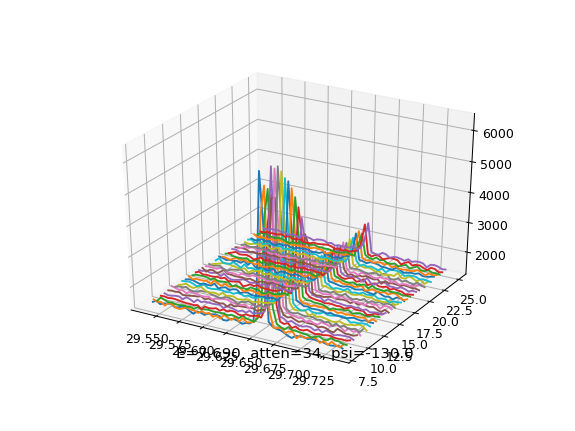

<IPython.core.display.Javascript object>


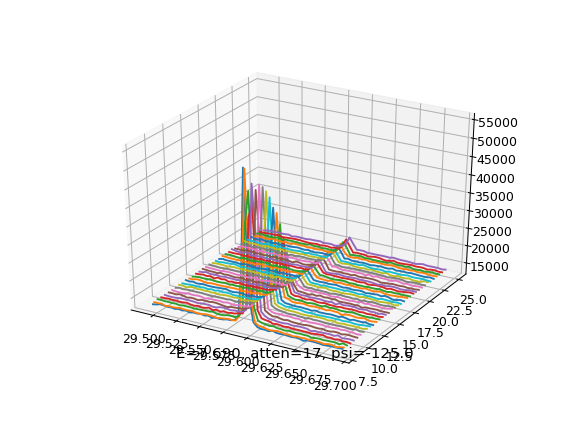

<IPython.core.display.Javascript object>


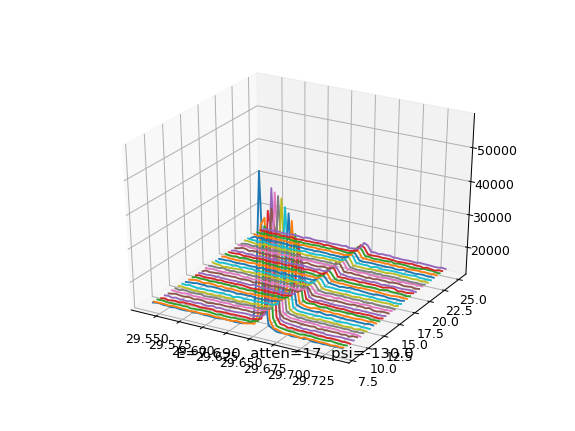

In [24]:
psi = 999
for i in range(900666, 900875+1):
    try:
        n = pdnx(p % i)
        n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
        
        psinew = float(n.nx.entry1.before_scan.psi.psi)
        if abs(psi-psinew)>.1:
            ax = figure().gca(projection='3d')
        psi = psinew
        
        energy = n.nx.entry1.sample.beam.incident_energy 
        atten = n.nx.entry1.before_scan.gains_atten.Atten
        transmission = n.nx.entry1.before_scan.gains_atten.Transmission
        ax.plot(n.eta, n.Ta, n.roi2_sum)
        title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))
    except:
        break

<IPython.core.display.Javascript object>


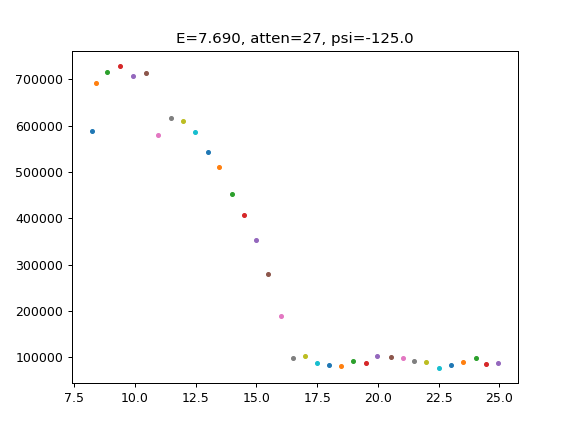

<IPython.core.display.Javascript object>


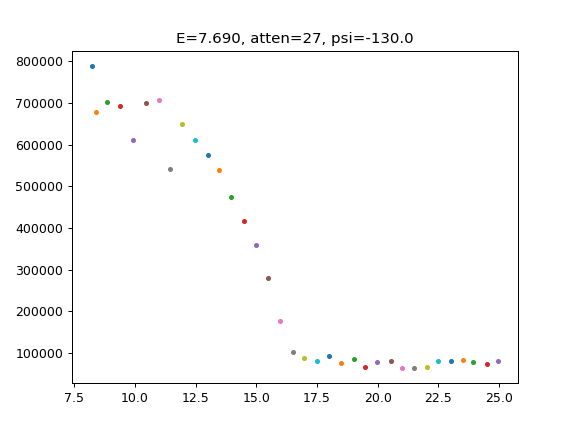

<IPython.core.display.Javascript object>


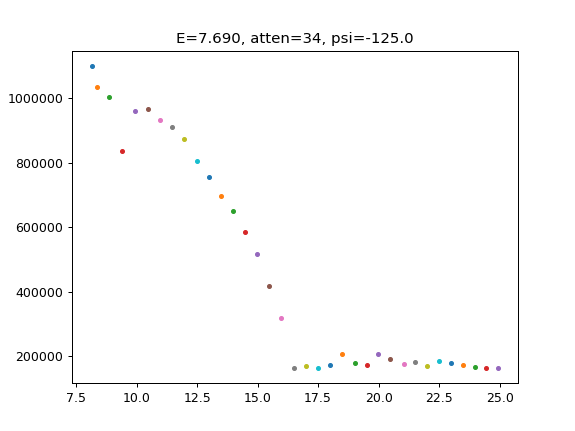

<IPython.core.display.Javascript object>


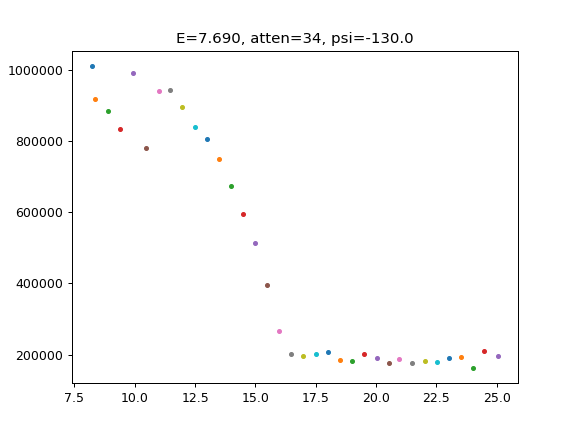

<IPython.core.display.Javascript object>


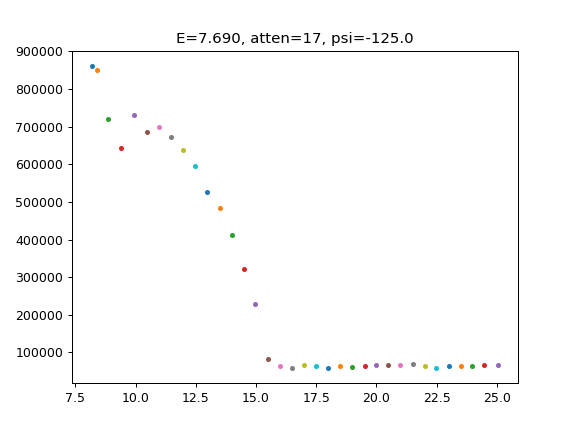

<IPython.core.display.Javascript object>


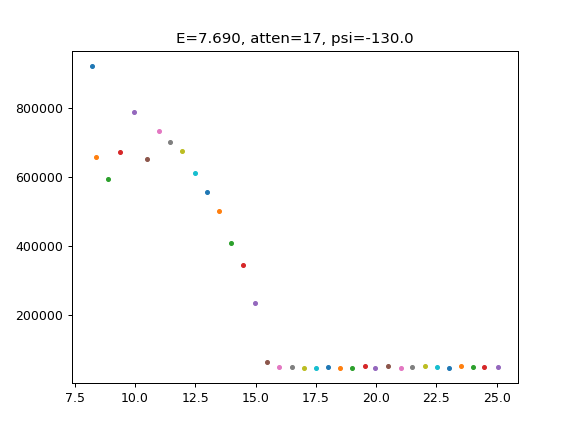

In [25]:
psi = 999
for i in range(900666, 900875+1):
    n = pdnx(p % i)
    n['Ta'] = float(n.nx.entry1.before_scan.lakeshore.Ta)
     
    psinew = float(n.nx.entry1.before_scan.psi.psi)
    if abs(psi-psinew)>.1:
        figure()
    psi = psinew
        
    energy = n.nx.entry1.sample.beam.incident_energy 
    atten = n.nx.entry1.before_scan.gains_atten.Atten
    transmission = n.nx.entry1.before_scan.gains_atten.Transmission
    n['norm_counts'] = n.roi2_sum/n.count_time/transmission
        
    [centre, fwhm_sd, fwhm_area, sum, height, area, m, c]=peak(n.eta, n.norm_counts, nbgpts=5)
        
    plot(np.mean(n.Ta), height, '.')
    title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))


<IPython.core.display.Javascript object>


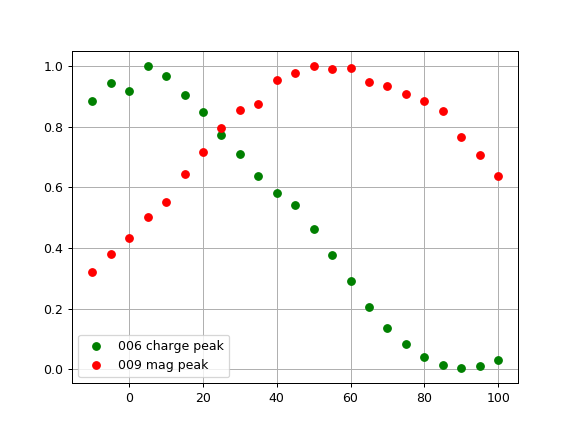

In [26]:
figure()
n = pdnx(p % 901013)
plot(n.rotp, n.APD/np.max(n.APD), 'go', label='006 charge peak'); grid(1)
n = pdnx(p % 901020)
plot(n.rotp, n.APD/np.max(n.APD), 'ro', label='009 mag peak'); grid(1)
legend()


<IPython.core.display.Javascript object>


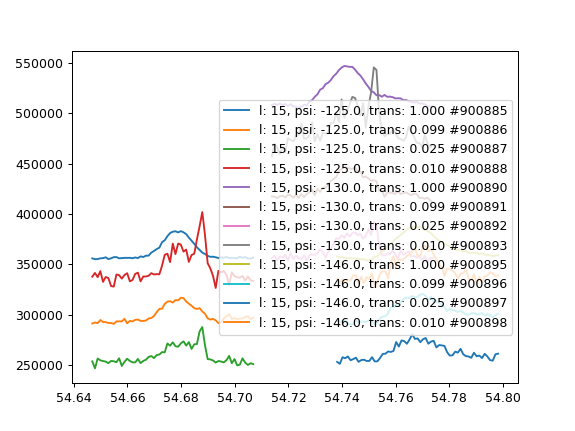

<IPython.core.display.Javascript object>


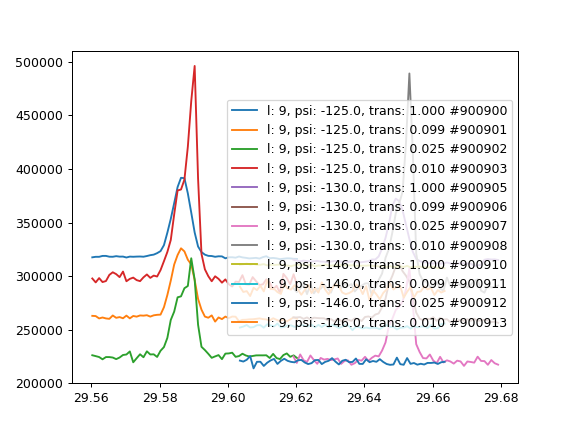

<IPython.core.display.Javascript object>


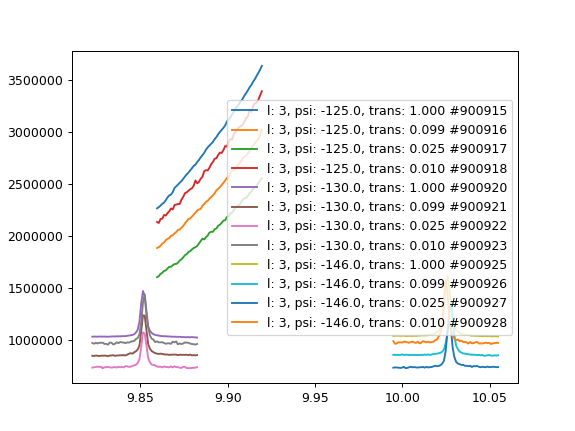

In [27]:
lval = 999
for i in range(900884, 900928+1):
    n = pdnx(p % i)
    if n.count_time[0] < 1.0:   #long eta alignment scan - ignore
        continue
    lnew = float(n.nx.entry1.before_scan.diffractometer_sample.l)
    if abs(lval-lnew)>.1:
        figure()
    lval = lnew
        
    atten = n.nx.entry1.before_scan.gains_atten.Atten
    transmission = n.nx.entry1.before_scan.gains_atten.Transmission
    psi = n.nx.entry1.before_scan.psi.psi
    n['norm_counts'] = n.roi2_sum/n.count_time/transmission
        
    #[centre, fwhm_sd, fwhm_area, sum, height, area, m, c]=peak(n.eta, n.norm_counts, nbgpts=5)
    labtxt = 'l: %i, psi: %.1f, trans: %.3f #%i' % (np.round(lval), psi, transmission, i)
    plot(n.eta, n.norm_counts, label = labtxt)
    legend(loc='right')
    #title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))

Very little change with attenuation (over two orders of magnitude) - not harmonics

Very little change with psi (except psi = -146 missaligned) - not multiple scattering

Some of the 009 data are a bit glitchy, depening on attenuation (which is odd)

Look at atten=0, psi =-125, for l=3, 9, 15

See below: 003 is strongest but 0,0,15 is stronger than 0,0,9

<IPython.core.display.Javascript object>


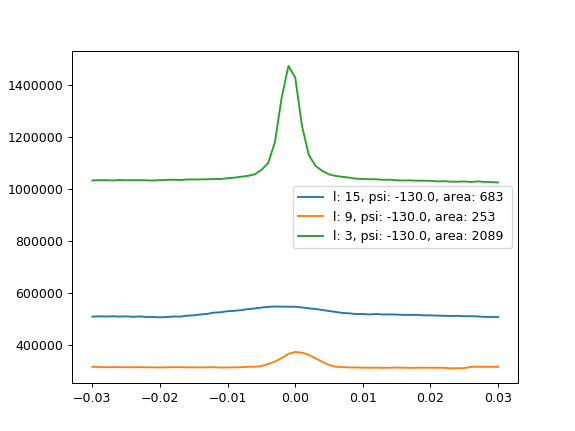

In [28]:
#for i in range(900884, 900928+1):
#    n = pdnx(p % i)
#    print(i, np.round(n.nx.entry1.before_scan.diffractometer_sample.l), n.nx.entry1.scan_command)
#[900885, 900900, 900915]

figure()
#for i in [900885, 900900, 900915]:
for i in [900890, 900905, 900920]:
    
    n = pdnx(p % i)

    atten = n.nx.entry1.before_scan.gains_atten.Atten
    transmission = n.nx.entry1.before_scan.gains_atten.Transmission
    psi = n.nx.entry1.before_scan.psi.psi
    lval = float(n.nx.entry1.before_scan.diffractometer_sample.l)
    n['norm_counts'] = n.roi2_sum/n.count_time/transmission
    [centre, fwhm_sd, fwhm_area, sum, height, area, m, c]=peak(n.eta, n.norm_counts, nbgpts=5) 

    labtxt = 'l: %i, psi: %.1f, area: %.0f ' % (np.round(lval), psi, area)
    plot(n.eta - np.mean(n.eta), n.norm_counts, label = labtxt)
    #yscale('log');
    legend()
    #title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))

<IPython.core.display.Javascript object>


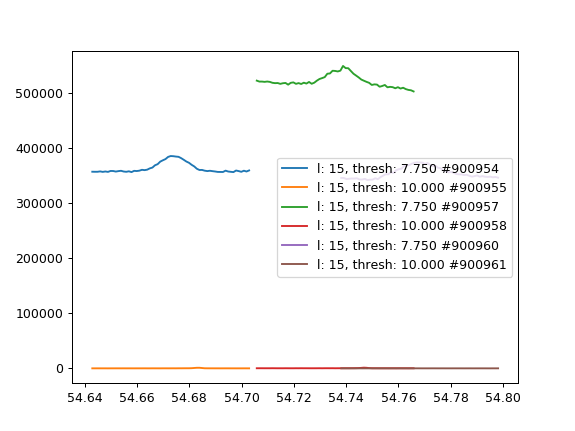

<IPython.core.display.Javascript object>


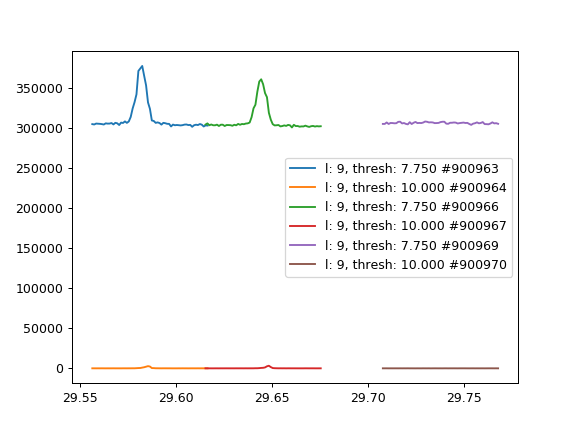

<IPython.core.display.Javascript object>


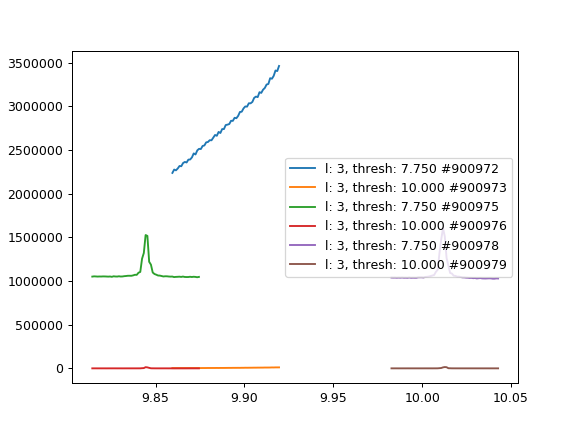

In [29]:
########  threshold 

lval = 999
for i in range(900953, 900979+1):
    n = pdnx(p % i)

    if np.max(n.eta)-np.min(n.eta) > .2:
        continue
    
    lnew = float(n.nx.entry1.before_scan.diffractometer_sample.l)
    if abs(lval-lnew)>.1:
        figure()
    lval = lnew
        
    thresh = n.nx.entry1.before_scan.dummypd.x
    n['norm_counts'] = n.roi2_sum/n.count_time/transmission
        
    labtxt = 'l: %i, thresh: %.3f #%i' % (np.round(lval), thresh, i)
    plot(n.eta, n.norm_counts, label = labtxt)
    legend(loc='right')
    #title('E=%.3f, atten=%i, psi=%.1f' % (energy, atten, psi))

Spurious peaks almost killed by increasing threshold to 10 keV - not harmonics

In [30]:
d_pg_006 = 1.1185
d_pg_004 = 1.67775

def theta(energy, dspace):
    return 180/np.pi * np.arcsin(6.2/dspace/energy)

def energy(theta, dspace):
    return 6.2/dspace/np.sin(theta*np.pi/180)

print(theta(7.7, d_pg_004))
print(energy(theta(7.7, d_pg_004), d_pg_004))

28.680528535570478
7.700000000000001


In [31]:
print(theta(8.5, d_pg_004))
print(theta(6, d_pg_004))

25.76976446341602
38.01765316502115


<IPython.core.display.Javascript object>


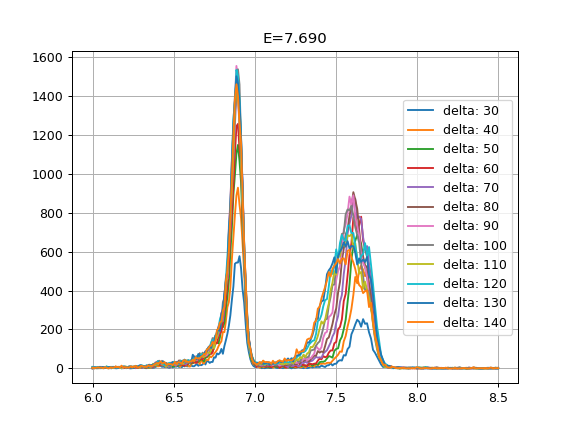

<IPython.core.display.Javascript object>


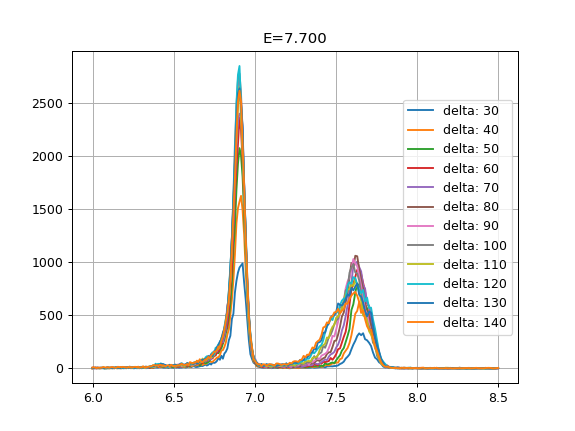

<IPython.core.display.Javascript object>


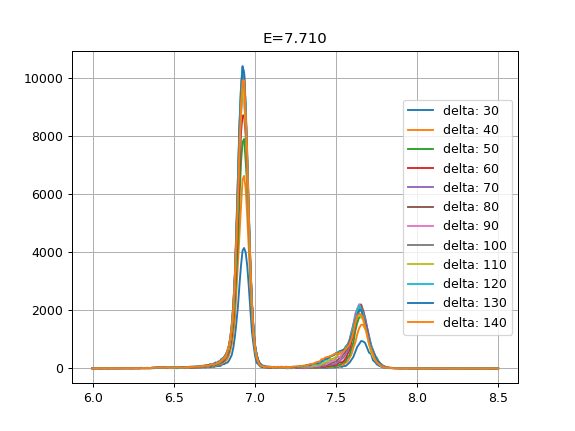

<IPython.core.display.Javascript object>


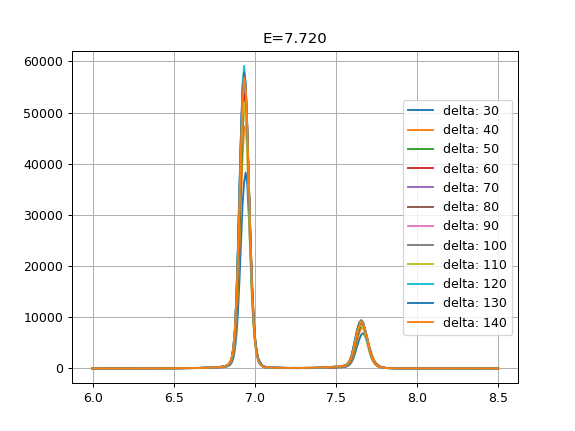

In [32]:
enval = 999
for i in range(901031, 901078+1):
    n = pdnx(p % i)
    en_new = n.nx.entry1.sample.beam.incident_energy
    if abs(enval-en_new)>.005:
        figure()
    enval = en_new
        
    e2 = energy(-n.thp, d_pg_004)
    labtxt = 'delta: %.0f' % n.nx.entry1.before_scan.diffractometer_sample.delta
    plot(e2, n.APD, label = labtxt)
    legend(loc='right')
    title('E=%.3f' % enval)
    grid(1)

Main two peaks are Co Ka (6.93 keV) and Co Kb (7.65 keV)

Below edge these are still strong (RRS) but Compton visible with max shift of 0.2 keV

Going to higher delta doesn't give much bigger shift (see Compton shift plots at top)

Need slightly narrower analyser reflection (mosaic ~ 0.5 deg for PG)

What analyser shape would give good pz resolution??? Is this possible??



scan thp -46.84464954114 -44.84464954114 0.1 t 0.5


<IPython.core.display.Javascript object>


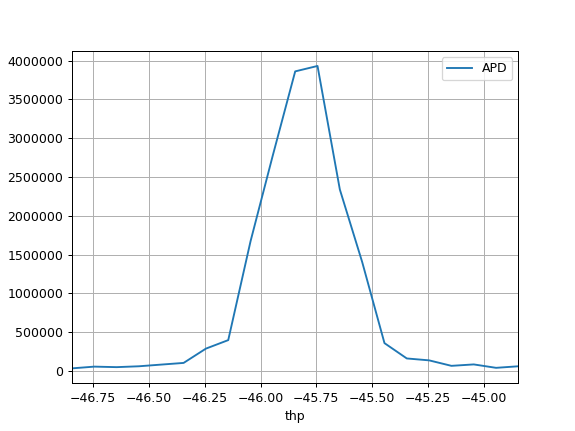

In [33]:
n = pdnx(p % 901009)
print(n.nx.entry1.scan_command)
n.plot('thp', 'APD'); grid(1)


In [34]:
i

901078